In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data_dic = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/feature_definitions.csv')
data_dic.head()

,Variable,Description
0,actualdpd_943P,Days Past Due (DPD) of previous contract (actu...
1,actualdpdtolerance_344P,DPD of client with tolerance.
2,addres_district_368M,District of the person's address.
3,addres_role_871L,Role of person's address.
4,addres_zip_823M,Zip code of the address.


In [5]:
base = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train/train_base.csv')
base.head()

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1


In [6]:
base.describe()

,case_id,MONTH,WEEK_NUM,target
count,1.526659e+06,1.526659e+06,1.526659e+06,1.526659e+06
mean,1.286077e+06,2.019363e+05,4.076904e+01,3.143728e-02
std,7.189466e+05,4.473597e+01,2.379798e+01,1.744964e-01
min,0.000000e+00,2.019010e+05,0.000000e+00,0.000000e+00
25%,7.661975e+05,2.019060e+05,2.300000e+01,0.000000e+00
50%,1.357358e+06,2.019100e+05,4.000000e+01,0.000000e+00
75%,1.739022e+06,2.020010e+05,5.500000e+01,0.000000e+00
max,2.703454e+06,2.020100e+05,9.100000e+01,1.000000e+00


In [25]:
base['target'].value_counts()

target
0    1478665
1      47994
Name: count, dtype: int64

In [7]:
stat_0 = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train/train_static_0_0.csv')
stat_0.head()

/tmp/ipykernel_34/2610658370.py:1: DtypeWarning: Columns (20,45,46,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  stat_0 = pd.read_csv('/kaggle/input/home-credit-credit-risk-model-stability/csv_files/train/train_static_0_0.csv')


,case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,clientscnt_946L,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,credamount_770A,credtype_322L,currdebt_22A,currdebtcredtyperange_828A,datefirstoffer_1144D,datelastinstal40dpd_247D,datelastunpaid_3546854D,daysoverduetolerancedd_3976961L,deferredmnthsnum_166L,disbursedcredamount_1113A,disbursementtype_67L,downpmt_116A,dtlastpmtallstes_4499206D,eir_270L,equalitydataagreement_891L,equalityempfrom_62L,firstclxcampaign_1125D,firstdatedue_489D,homephncnt_628L,inittransactionamount_650A,inittransactioncode_186L,interestrate_311L,interestrategrace_34L,isbidproduct_1095L,isbidproductrequest_292L,isdebitcard_729L,lastactivateddate_801D,lastapplicationdate_877D,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastapprdate_640D,lastcancelreason_561M,lastdelinqdate_224D,lastdependentsnum_448L,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectdate_50D,lastrejectreason_759M,lastrejectreasonclient_4145040M,lastrepayingdate_696D,lastst_736L,maininc_215A,mastercontrelectronic_519L,mastercontrexist_109L,maxannuity_159A,maxannuity_4075009A,maxdbddpdlast1m_3658939P,maxdbddpdtollast12m_3658940P,maxdbddpdtollast6m_4187119P,maxdebt4_972A,maxdpdfrom6mto36m_3546853P,maxdpdinstldate_3546855D,maxdpdinstlnum_3546846P,maxdpdlast12m_727P,maxdpdlast24m_143P,maxdpdlast3m_392P,maxdpdlast6m_474P,maxdpdlast9m_1059P,maxdpdtolerance_374P,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,mindbddpdlast24m_3658935P,mindbdtollast24m_4525191P,mobilephncnt_593L,monthsannuity_845L,numactivecreds_622L,numactivecredschannel_414L,numactiverelcontr_750L,numcontrs3months_479L,numincomingpmts_3546848L,numinstlallpaidearly3d_817L,numinstls_657L,numinstlsallpaid_934L,numinstlswithdpd10_728L,numinstlswithdpd5_4187116L,numinstlswithoutdpd_562L,numinstmatpaidtearly2d_4499204L,numinstpaid_4499208L,numinstpaidearly3d_3546850L,numinstpaidearly3dest_4493216L,numinstpaidearly5d_1087L,numinstpaidearly5dest_4493211L,numinstpaidearly5dobd_4499205L,numinstpaidearly_338L,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
0,0,NaN,NaN,1917.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,30000.0,CAL,0.0,0.0,NaN,NaN,NaN,NaN,0.0,30000.0,GBA,0.0,NaN,0.4500,NaN,NaN,NaN,NaN,0

In [23]:
stat_0['lastst_736L'].describe()

count     782997
unique        11
top            D
freq      243667
Name: lastst_736L, dtype: object

In [24]:
stat_0['lastst_736L'].dtypes

dtype('O')

In [25]:
stat_0['lastst_736L'].unique()

array([nan, 'D', 'T', 'A', 'K', 'N', 'S', 'Q', 'L', 'H', 'R', 'P'],
      dtype=object)

In [26]:
stat_0['lastst_736L'].value_counts()

lastst_736L
D    243667
A    241163
K    210769
T     71598
N     12585
S      2083
Q       846
L       189
H        85
P         8
R         4
Name: count, dtype: int64

In [28]:
stat_0['maininc_215A'].describe()

count    662807.000000
mean      48482.535736
std       31946.598199
min           0.000000
25%       30000.000000
50%       40000.000000
75%       60000.000000
max      200000.000000
Name: maininc_215A, dtype: float64

(array([ 81085., 201774., 188247., 106106.,  38276.,  21281.,   9193.,
          5637.,   3857.,   7351.]),
 array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000., 200000.]),
 <BarContainer object of 10 artists>)

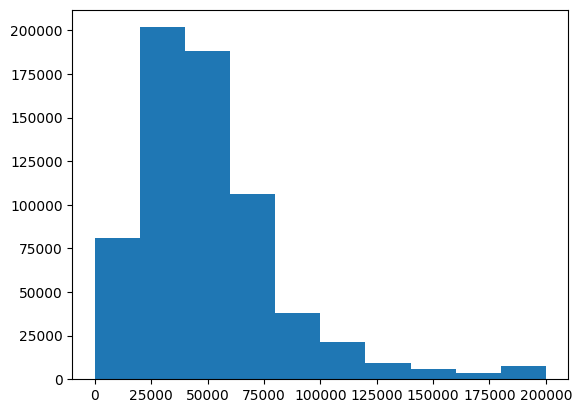

In [29]:
plt.hist(stat_0['maininc_215A'])

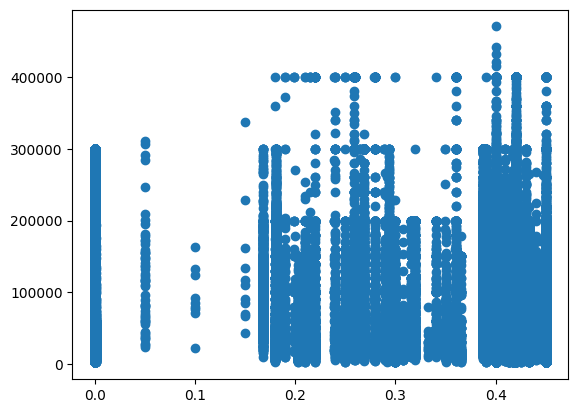

In [22]:
plt.scatter(stat_0['interestrate_311L'], stat_0['credamount_770A'])
plt.show()

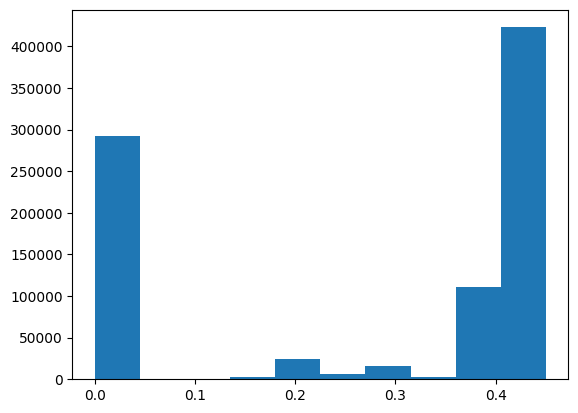

In [20]:
plt.hist(stat_0[stat_0['interestrate_311L'].notnull()]['interestrate_311L'])
plt.show()

In [9]:
stat_0[stat_0['eir_270L'] == 0].head()

,case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,clientscnt_946L,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,credamount_770A,credtype_322L,currdebt_22A,currdebtcredtyperange_828A,datefirstoffer_1144D,datelastinstal40dpd_247D,datelastunpaid_3546854D,daysoverduetolerancedd_3976961L,deferredmnthsnum_166L,disbursedcredamount_1113A,disbursementtype_67L,downpmt_116A,dtlastpmtallstes_4499206D,eir_270L,equalitydataagreement_891L,equalityempfrom_62L,firstclxcampaign_1125D,firstdatedue_489D,homephncnt_628L,inittransactionamount_650A,inittransactioncode_186L,interestrate_311L,interestrategrace_34L,isbidproduct_1095L,isbidproductrequest_292L,isdebitcard_729L,lastactivateddate_801D,lastapplicationdate_877D,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastapprdate_640D,lastcancelreason_561M,lastdelinqdate_224D,lastdependentsnum_448L,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectdate_50D,lastrejectreason_759M,lastrejectreasonclient_4145040M,lastrepayingdate_696D,lastst_736L,maininc_215A,mastercontrelectronic_519L,mastercontrexist_109L,maxannuity_159A,maxannuity_4075009A,maxdbddpdlast1m_3658939P,maxdbddpdtollast12m_3658940P,maxdbddpdtollast6m_4187119P,maxdebt4_972A,maxdpdfrom6mto36m_3546853P,maxdpdinstldate_3546855D,maxdpdinstlnum_3546846P,maxdpdlast12m_727P,maxdpdlast24m_143P,maxdpdlast3m_392P,maxdpdlast6m_474P,maxdpdlast9m_1059P,maxdpdtolerance_374P,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,mindbddpdlast24m_3658935P,mindbdtollast24m_4525191P,mobilephncnt_593L,monthsannuity_845L,numactivecreds_622L,numactivecredschannel_414L,numactiverelcontr_750L,numcontrs3months_479L,numincomingpmts_3546848L,numinstlallpaidearly3d_817L,numinstls_657L,numinstlsallpaid_934L,numinstlswithdpd10_728L,numinstlswithdpd5_4187116L,numinstlswithoutdpd_562L,numinstmatpaidtearly2d_4499204L,numinstpaid_4499208L,numinstpaidearly3d_3546850L,numinstpaidearly3dest_4493216L,numinstpaidearly5d_1087L,numinstpaidearly5dest_4493211L,numinstpaidearly5dobd_4499205L,numinstpaidearly_338L,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
123791,598839,NaN,NaN,4208.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,42796.0,COL,0.0,0.0,NaN,NaN,NaN,NaN,0.0,42796.0,SBA,12000.0,NaN,0.0,NaN,NaN

In [33]:
data_dic[data_dic['Variable'].isin(stat_0.columns)].to_csv('variable_desc.csv', index=False)

In [27]:
data_dic[data_dic['Variable'].isin(stat_0.columns)]

,Variable,Description
1,actualdpdtolerance_344P,DPD of client with tolerance.
14,amtinstpaidbefduel24m_4187115A,Number of instalments paid before due date in ...
17,annuity_780A,Monthly annuity amount.
19,annuitynextmonth_57A,Next month's amount of annuity.
20,applicationcnt_361L,Number of applications associated with the sam...
21,applications30d_658L,Number of applications made by the client in t...
22,applicationscnt_1086L,Number of applications associated with the sam...
23,applicationscnt_464L,Number of applications made in the last 30 day...
24,applicationscnt_629L,Number of applications with the same employer ...
25,applicationscnt_867L,Number of applications associated with the sam...


In [28]:
stat_0.count()

case_id                            1003757
actualdpdtolerance_344P             707071
amtinstpaidbefduel24m_4187115A      574903
annuity_780A                       1003757
annuitynextmonth_57A               1003755
applicationcnt_361L                1003757
applications30d_658L               1003757
applicationscnt_1086L              1003757
applicationscnt_464L               1003757
applicationscnt_629L               1003757
applicationscnt_867L               1003757
avgdbddpdlast24m_3658932P           577626
avgdbddpdlast3m_4187120P            345754
avgdbdtollast24m_4525197P           218032
avgdpdtolclosure24_3658938P         674485
avginstallast24m_3658937A           570036
avglnamtstart24m_4525187A            69807
avgmaxdpdlast9m_3716943P            488464
avgoutstandbalancel6m_4187114A      404763
avgpmtlast12m_4525200A              196447
bankacctype_710L                    304690
cardtype_51L                        125784
clientscnt12m_3712952L             1003757
clientscnt3

In [29]:
stat_0.dtypes

case_id                              int64
actualdpdtolerance_344P            float64
amtinstpaidbefduel24m_4187115A     float64
annuity_780A                       float64
annuitynextmonth_57A               float64
applicationcnt_361L                float64
applications30d_658L               float64
applicationscnt_1086L              float64
applicationscnt_464L               float64
applicationscnt_629L               float64
applicationscnt_867L               float64
avgdbddpdlast24m_3658932P          float64
avgdbddpdlast3m_4187120P           float64
avgdbdtollast24m_4525197P          float64
avgdpdtolclosure24_3658938P        float64
avginstallast24m_3658937A          float64
avglnamtstart24m_4525187A          float64
avgmaxdpdlast9m_3716943P           float64
avgoutstandbalancel6m_4187114A     float64
avgpmtlast12m_4525200A             float64
bankacctype_710L                    object
cardtype_51L                        object
clientscnt12m_3712952L             float64
clientscnt3

In [31]:
to_drop = []
row_count = len(stat_0.index)
drop_threshold = 0.1 * row_count

for c in stat_0.columns:
    if stat_0[c].count() < drop_threshold:
        print(stat_0[c].count() , '<>', drop_threshold)
        to_drop.append(c)
print(to_drop)
stat_0.drop(columns=to_drop, inplace=True)

69807 <> 100375.70000000001
397 <> 100375.70000000001
71493 <> 100375.70000000001
52312 <> 100375.70000000001
28405 <> 100375.70000000001
16583 <> 100375.70000000001
8476 <> 100375.70000000001
25058 <> 100375.70000000001
2228 <> 100375.70000000001
2171 <> 100375.70000000001
1605 <> 100375.70000000001
50122 <> 100375.70000000001
1467 <> 100375.70000000001
['avglnamtstart24m_4525187A', 'clientscnt_136L', 'datelastinstal40dpd_247D', 'equalitydataagreement_891L', 'equalityempfrom_62L', 'interestrategrace_34L', 'isbidproductrequest_292L', 'lastdependentsnum_448L', 'lastotherinc_902A', 'lastotherlnsexpense_631A', 'lastrepayingdate_696D', 'maxannuity_4075009A', 'payvacationpostpone_4187118D']


In [32]:
stat_0.count()

case_id                            1003757
actualdpdtolerance_344P             707071
amtinstpaidbefduel24m_4187115A      574903
annuity_780A                       1003757
annuitynextmonth_57A               1003755
applicationcnt_361L                1003757
applications30d_658L               1003757
applicationscnt_1086L              1003757
applicationscnt_464L               1003757
applicationscnt_629L               1003757
applicationscnt_867L               1003757
avgdbddpdlast24m_3658932P           577626
avgdbddpdlast3m_4187120P            345754
avgdbdtollast24m_4525197P           218032
avgdpdtolclosure24_3658938P         674485
avginstallast24m_3658937A           570036
avgmaxdpdlast9m_3716943P            488464
avgoutstandbalancel6m_4187114A      404763
avgpmtlast12m_4525200A              196447
bankacctype_710L                    304690
cardtype_51L                        125784
clientscnt12m_3712952L             1003757
clientscnt3m_3712950L              1003757
clientscnt6

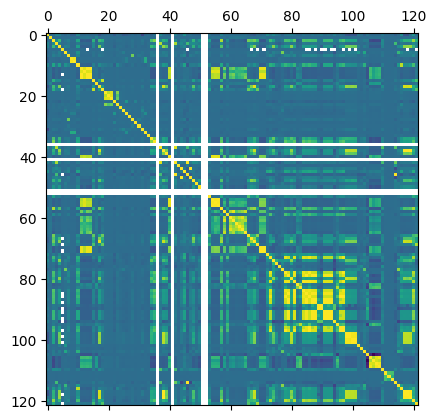

In [34]:
plt.matshow(stat_0.select_dtypes(include='number').corr())

In [35]:
plt.show()

In [36]:
import missingno as msno

<Axes: >

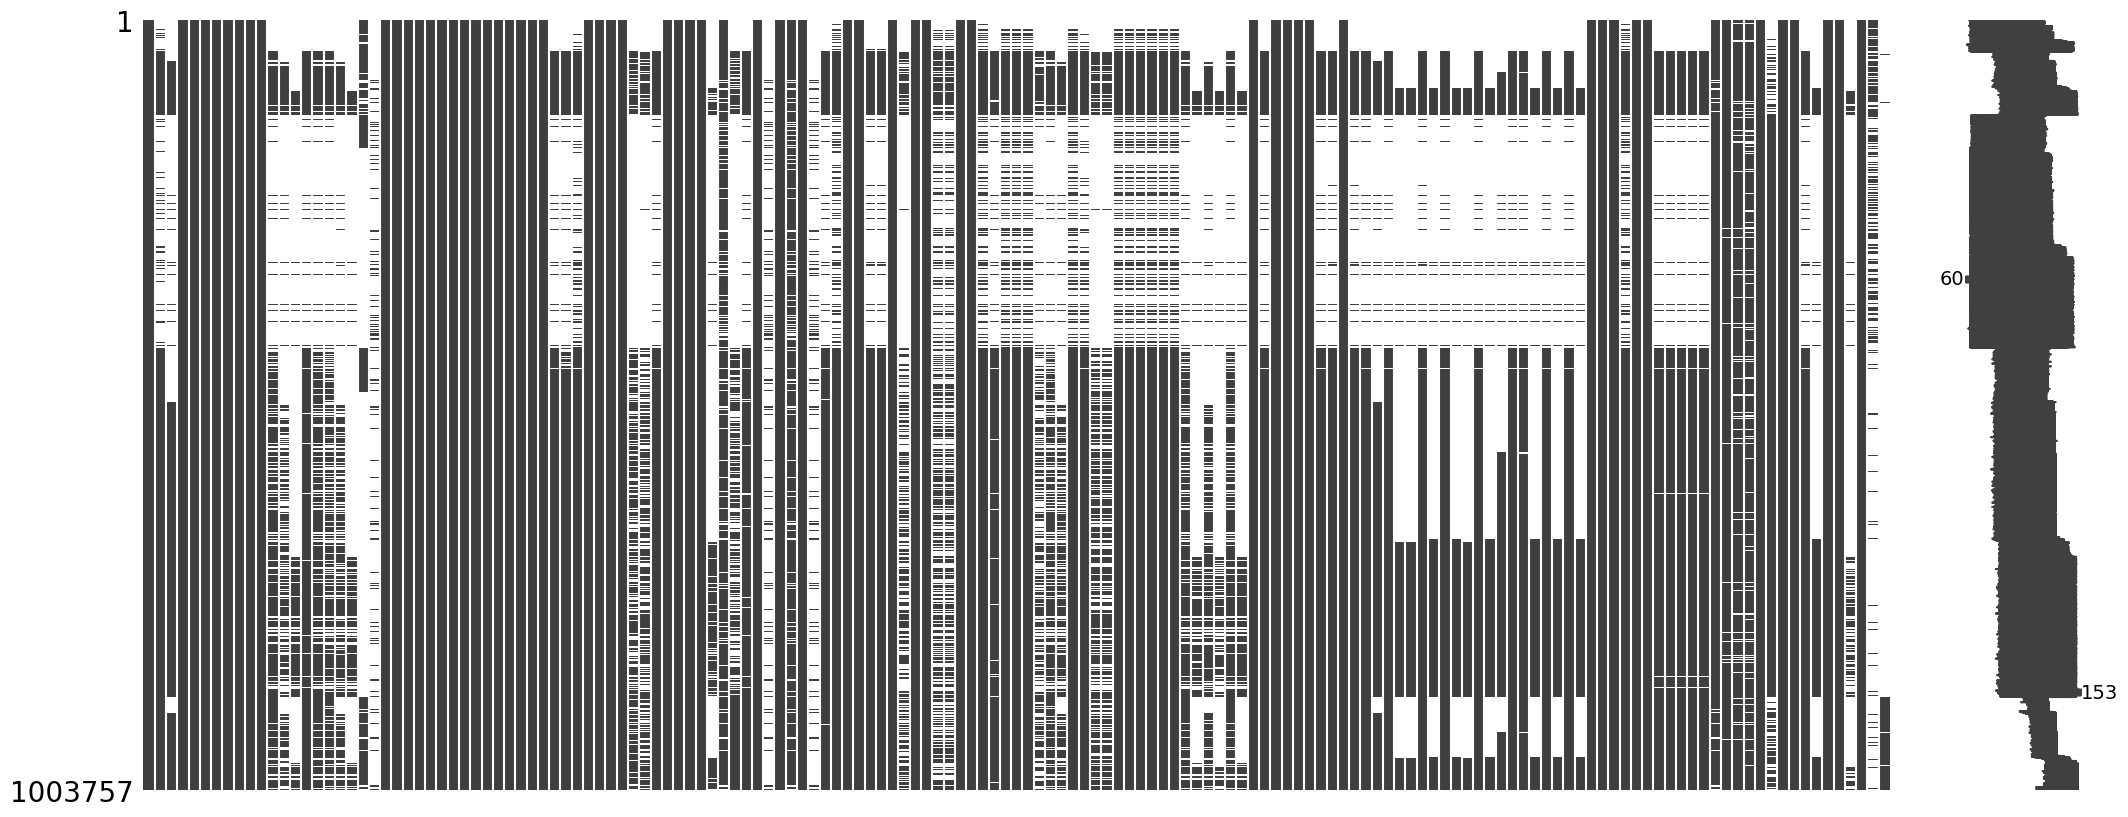

In [37]:
msno.matrix(stat_0)

In [35]:
stat_0['maxdbddpdtollast6m_4187119P'].count()

386922

In [40]:
# number where both 6m and 12m are both null
len(stat_0[(stat_0['maxdbddpdtollast6m_4187119P'].isnull()) & (stat_0['maxdbddpdtollast12m_3658940P'].isnull())].index)

483172

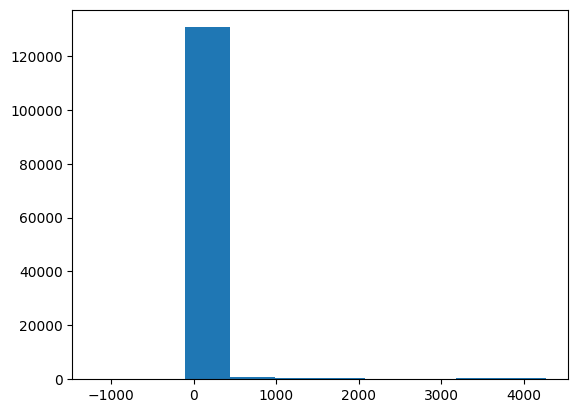

In [42]:
last6m_null_12m_not_null = stat_0[(stat_0['maxdbddpdtollast6m_4187119P'].isnull()) & (stat_0['maxdbddpdtollast12m_3658940P'].notnull())]
plt.hist(last6m_null_12m_not_null['maxdbddpdtollast12m_3658940P'])
plt.show()

In [46]:
stat_0['price_1097A'].describe()

count    869385.000000
mean      33339.941490
std       33206.102117
min           0.000000
25%       13400.000000
50%       24478.000000
75%       43956.000000
max      761867.440000
Name: price_1097A, dtype: float64